# Curvas I-V para circuitos RC - Proyecto Experimental

Daniel Dorado Toro

Elaborado: 23-09-2022

Actualizado: 20-10-2022


En este notebook produzco las gráficas de algunos de los datos tomados hasta el momento. Hasta ahora, he tomado datos para 4 resistencias (5.1 kOhms, 470 kOhms, 680 kOhms, 1 MOhms) y 25 capacitancias diferentes (entre 1pF y 100nF). El número de puntos fue de 100, el compliance se fijó en 0.1 y el voltaje se varió entre -1V y +1V.

Para futuras tomas de datos reduciré el número de capacitancias a 10, puesto que hay valores que dan resultados muy similares. Incluyo aquí algunas de las gráficas que ilustran el comportamiento general de las curvas.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
RC_data = {}

for root, dirs, files in os.walk('./Datos/100pts'):
    for name in files:
        if '.txt' in name:
            R = name[name.find('R')+len('R'):name.rfind('_C')]
            C = name[name.find('C')+len('C'):name.rfind('.')]
            RC_data[(R,C)] = pd.read_csv('./Datos/100pts/'+name, delimiter='\t', 
                                         names=['Voltage (V)', 'Current (A)', 'Resistance (Ohms)'])

### Zig-zag en las curvas para bajas capacitancias.

Para capacitancias por debajo de los 600 pF, las curvas solo hacen un zig-zag en valores de baja corriente, como se aprecia en la gráfica de abajo. Tengo la hipótesis de que esto se debe al nivel de compliance. Como las bajas capacitancias producen una impedancia baja, la corriente es más grande para estas capacitancias bajas y seguramente supera el valor determinado de compliance. No he querido modificar este valor, puesto que no sé hasta qué punto es seguro hacerlo.

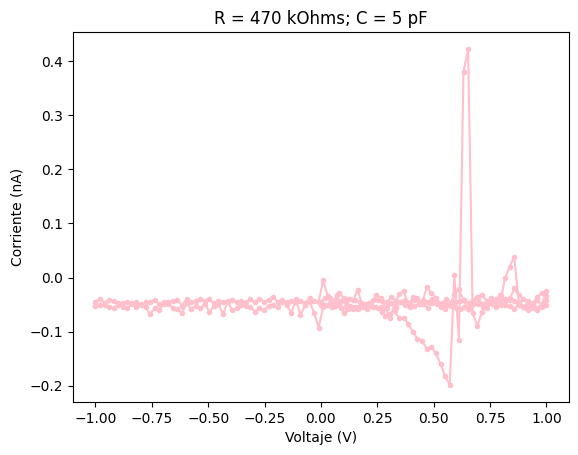

In [3]:
data = RC_data[('470kOhms', '5pF')]

plt.plot(data['Voltage (V)'], data['Current (A)']*1e+9, color = 'pink', marker='o', ms=3, )
plt.xlabel('Voltaje (V)')
plt.ylabel('Corriente (nA)')
plt.title('R = 470 kOhms; C = 5 pF')

plt.show()

### Variando el valor de la capacitancia

Las curvas presentan el comportamiento histerético esperado. Las curvas se hacen más altas a medida que aumenta la capacitancia. Esto tiene sentido, pues la impedancia es menor para capacitancias mayores.

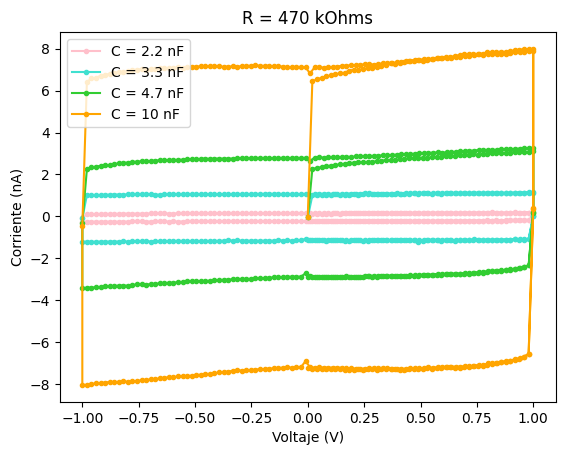

In [4]:
data1 = RC_data[('470kOhms', '2,2nF')]
data2 = RC_data[('470kOhms', '3,3nF')]
data3 = RC_data[('470kOhms', '4,7nF')]
data4 = RC_data[('470kOhms', '10nF')]

plt.plot(data1['Voltage (V)'], data1['Current (A)']*1e+9, color = 'pink', marker='o', ms=3, label = 'C = 2.2 nF')
plt.plot(data2['Voltage (V)'], data2['Current (A)']*1e+9, color = 'turquoise', marker='o', ms=3, label = 'C = 3.3 nF')
plt.plot(data3['Voltage (V)'], data3['Current (A)']*1e+9, color = 'limegreen', marker='o', ms=3, label = 'C = 4.7 nF')
plt.plot(data4['Voltage (V)'], data4['Current (A)']*1e+9, color = 'orange', marker='o', ms=3, label = 'C = 10 nF')
plt.xlabel('Voltaje (V)')
plt.ylabel('Corriente (nA)')
plt.title('R = 470 kOhms')
plt.legend()

plt.show()

La forma es muy similar para distintos valores de la capacitancia.

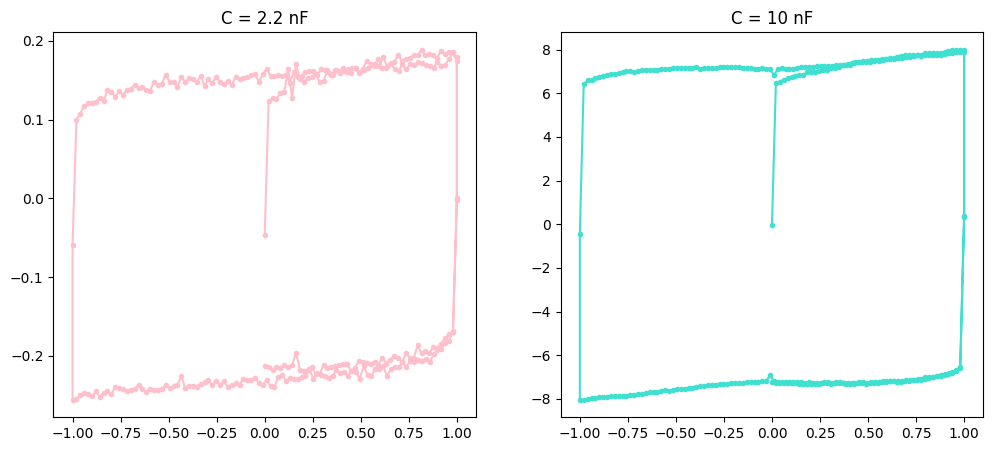

In [5]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(data1['Voltage (V)'], data1['Current (A)']*1e+9, color = 'pink', marker='o', ms=3)
ax[0].set_title('C = 2.2 nF')

ax[1].plot(data4['Voltage (V)'], data4['Current (A)']*1e+9, color = 'turquoise', marker='o', ms=3)
ax[1].set_title('C = 10 nF')

plt.show()

### Variando la resistencia

En este caso, al aumentar la resistencia aumenta la corriente. La forma sigue conservandose para distintas resistencias. 

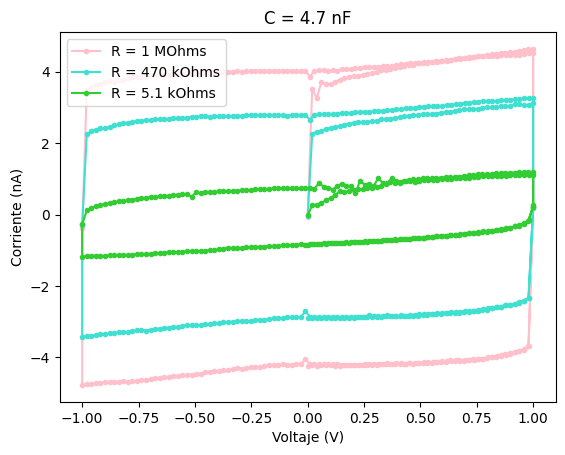

In [6]:
data1 = RC_data[('1MOhms', '4,7nF')]
data2 = RC_data[('470kOhms', '4,7nF')]
data3 = RC_data[('5,1kOhms', '4,7nF')]

plt.plot(data1['Voltage (V)'], data1['Current (A)']*1e+9, color = 'pink', marker='o', ms=3, label = 'R = 1 MOhms')
plt.plot(data2['Voltage (V)'], data2['Current (A)']*1e+9, color = 'turquoise', marker='o', ms=3, label = 'R = 470 kOhms')
plt.plot(data3['Voltage (V)'], data3['Current (A)']*1e+9, color = 'limegreen', marker='o', ms=3, label = 'R = 5.1 kOhms')


plt.xlabel('Voltaje (V)')
plt.ylabel('Corriente (nA)')
plt.title('C = 4.7 nF')
plt.legend()

plt.show()

### Distintos valores de RC

Al aumentar el producto de la resistencia y la capacitancia (RC) no hay una relación tan clara con la máxima corriente.

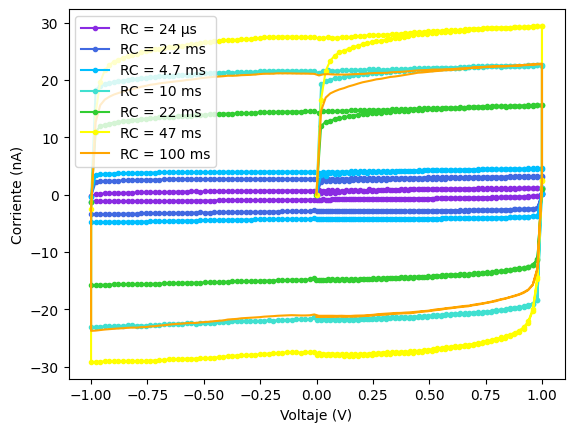

In [7]:
data1 = RC_data[('5,1kOhms', '4,7nF')]
data2 = RC_data[('470kOhms', '4,7nF')]
data3 = RC_data[('1MOhms', '4,7nF')]
data4 = RC_data[('470kOhms', '22nF')]
data5 = RC_data[('1MOhms', '22nF')]
data6 = RC_data[('1MOhms', '47nF')]
data7 = RC_data[('1MOhms', '100nF')]

plt.plot(data1['Voltage (V)'], data1['Current (A)']*1e+9, color = 'blueviolet', marker='o', ms=3, label = 'RC = 24 µs')
plt.plot(data2['Voltage (V)'], data2['Current (A)']*1e+9, color = 'royalblue', marker='o', ms=3, label = 'RC = 2.2 ms')
plt.plot(data3['Voltage (V)'], data3['Current (A)']*1e+9, color = 'deepskyblue', marker='o', ms=3, label = 'RC = 4.7 ms')
plt.plot(data4['Voltage (V)'], data4['Current (A)']*1e+9, color = 'turquoise', marker='o', ms=3, label = 'RC = 10 ms')
plt.plot(data5['Voltage (V)'], data5['Current (A)']*1e+9, color = 'limegreen', marker='o', ms=3, label = 'RC = 22 ms')
plt.plot(data6['Voltage (V)'], data6['Current (A)']*1e+9, color = 'yellow', marker='o', ms=3, label = 'RC = 47 ms')
plt.plot(data7['Voltage (V)'], data7['Current (A)']*1e+9, color = 'orange', ms=3, label = 'RC = 100 ms')

plt.xlabel('Voltaje (V)')
plt.ylabel('Corriente (nA)')
plt.legend()

plt.show()

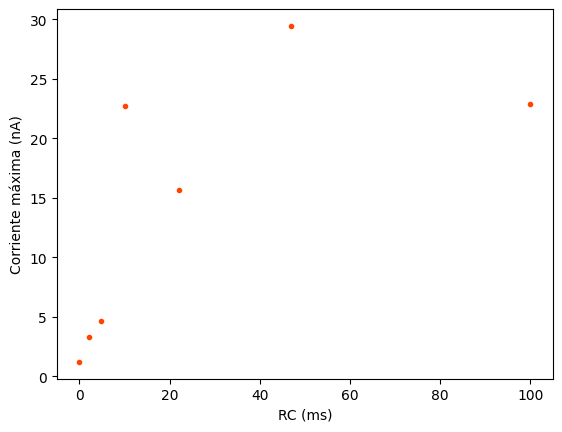

In [8]:
tau = [0.0024, 2.2, 4.7, 10, 22, 47, 100]
I_max = [np.max(data1['Current (A)']*1e+9), np.max(data2['Current (A)']*1e+9), np.max(data3['Current (A)']*1e+9),
         np.max(data4['Current (A)']*1e+9), np.max(data5['Current (A)']*1e+9), np.max(data6['Current (A)']*1e+9),
         np.max(data7['Current (A)']*1e+9)]


plt.plot(tau, I_max, ls ='', marker = 'o', color = 'orangered', ms = 3)
plt.xlabel('RC (ms)')
plt.ylabel('Corriente máxima (nA)')

plt.show()

### Variando el número de puntos

In [9]:
Points_data = {}

for root, dirs, files in os.walk('./Datos'):
    for name in files:
        if 'pts.txt' in name:
            N_points = name[name.find('F_')+len('F_'):name.rfind('pts')]
            Points_data[int(N_points)] = pd.read_csv('./Datos/'+name, delimiter='\t', 
                                         names=['Voltage (V)', 'Current (A)', 'Resistance (Ohms)'])
            
keys = list(Points_data.keys())
keys.sort()

In [10]:
colors = ['darkviolet', 'blueviolet', 'mediumslateblue', 'royalblue', 'dodgerblue', 'deepskyblue',
          'darkturquoise', 'aqua', 'turquoise', 'mediumspringgreen', 'lime', 'limegreen', 'greenyellow',
          'yellow', 'gold', 'orange', 'darkorange', 'orangered', 'red', 'black']

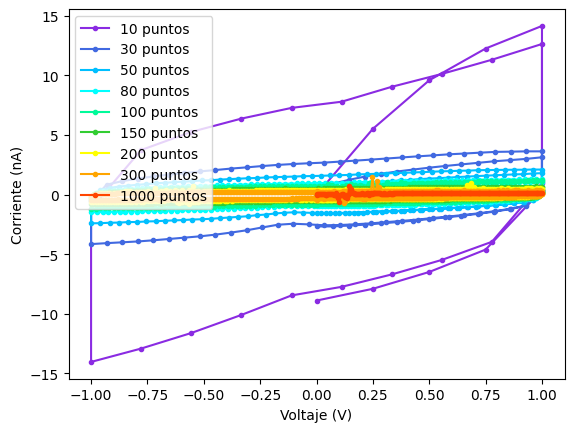

In [11]:
for i, key in enumerate(keys):
    dF = Points_data[key]
    plt.plot(dF['Voltage (V)'], dF['Current (A)']*1e+9, color = colors[2*i+1], marker='o', ms=3, label = '{} puntos'.format(key))
    
plt.xlabel('Voltaje (V)')
plt.ylabel('Corriente (nA)')
plt.legend()

plt.show()

El número de puntos parece disminuir la corriente máxima. Según Jhony, el número de puntos no afecta la tasa de muestreo, pero la forma de los datos no debería cambiar si este fuera el caso.

### Variando la tasa de muestreo

La tasa de muestreo por defecto es de 1 power line cycle (PLC, i.e. 60 Hz) y se puede modificar entre 0.01 PLC y 10 PLC. No obstante, al aumentar la tasa de muestreo, el tiempo de integración es menor y esto se traduce en una menor precisión.

A continuación se encuentran los datos obtenidos para distintas tasas de muestreo. Los datos son poco dicientes para tasas de 0.01 PLC (0.167 ms) y 0.1 PLC (1.67 ms) y al intentar configurar una tasa más lenta (mayor número de PLCs) ocurren errores en la toma de datos.

In [12]:
data_Fast = pd.read_csv('./Datos/20221010_R5,1kOhms_C4,7nF_Fast.txt', delimiter='\t', 
                                         names=['Voltage (V)', 'Current (A)', 'Resistance (Ohms)'])

data_Med = pd.read_csv('./Datos/20221010_R5,1kOhms_C4,7nF_Med.txt', delimiter='\t', 
                                         names=['Voltage (V)', 'Current (A)', 'Resistance (Ohms)'])

data_Norm = pd.read_csv('./Datos/20221010_R5,1kOhms_C4,7nF_Normal.txt', delimiter='\t', 
                                         names=['Voltage (V)', 'Current (A)', 'Resistance (Ohms)'])

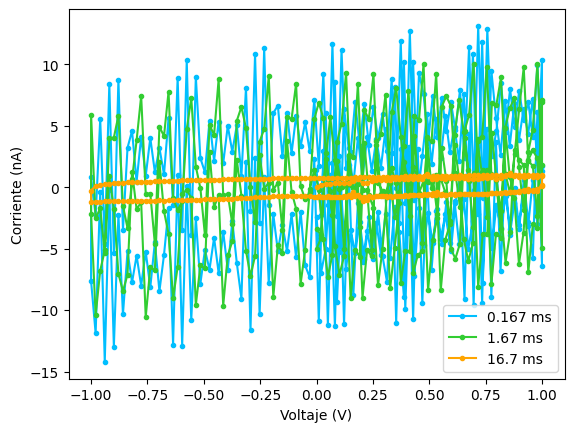

In [13]:
plt.plot(data_Fast['Voltage (V)'], data_Fast['Current (A)']*1e+9, color = colors[5], marker='o', ms=3, label = '0.167 ms')
plt.plot(data_Med['Voltage (V)'], data_Med['Current (A)']*1e+9, color = colors[11], marker='o', ms=3, label = '1.67 ms')
plt.plot(data_Norm['Voltage (V)'], data_Norm['Current (A)']*1e+9, color = colors[15], marker='o', ms=3, label = '16.7 ms')
    
plt.xlabel('Voltaje (V)')
plt.ylabel('Corriente (nA)')
plt.legend()

plt.show()